In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/stylegan2"

Mounted at /content/drive
/content/drive/My Drive/stylegan2


In [ ]:
!ls

babies	lfw_combined  stylegan2


In [ ]:
%cd "/content/drive/My Drive/stylegan2/stylegan2"

/content/drive/My Drive/stylegan2/stylegan2


In [ ]:
!ls

datasets		requirements.txt
dataset_tool.py		results
dnnlib			run_generator.py
Dockerfile		run_metrics.py
docs			run_projector.py
easy-install.sh		run_training.py
generated-0.7.zip	runway_model.py
latent-walk-v2.mp4	runway.yml
LICENSE.txt		StyleGAN2_Google_Colab_Example.ipynb
metrics			StyleGAN2_projection_interpolation.ipynb
out			StyleGAN2_Projection.ipynb
pkl			test_nvcc
pretrained_networks.py	test_nvcc.cu
projector.py		training
__pycache__		USAGE.md
README.md


In [4]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
# Lets check for files if they exist and use popular list show command
%cd "/content/drive/My Drive/stylegan2"
!ls

/content/drive/My Drive/stylegan2
babies	lfw_combined  stylegan2


In [ ]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"

/content/drive/My Drive/stylegan2/stylegan2


In [ ]:
%cd "/content/drive/My Drive/stylegan2/babies"

/content/drive/My Drive/stylegan2/babies


In [ ]:
#!/usr/bin/python
from PIL import Image
import os, sys

path = "/content/drive/My Drive/stylegan2/babies/"
dirs = os.listdir(path)

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((256,256), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=90)

resize()

In [ ]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"
#2nd argument is where to put your tfrecords files
#3rd should point at your image dataset
!python dataset_tool.py create_from_images /content/drive/My\ Drive/stylegan2/stylegan2/datasets/babies /content/drive/My\ Drive/stylegan2/babies

/content/drive/My Drive/stylegan2/stylegan2
Loading images from "/content/drive/My Drive/stylegan2/babies"
100% 93/93 [00:03<00:00, 27.20it/s]


In [ ]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/datasets/babies/"
!ls

/content/drive/My Drive/stylegan2/stylegan2/datasets/babies
babies-r02.tfrecords  babies-r05.tfrecords  babies-r08.tfrecords
babies-r03.tfrecords  babies-r06.tfrecords
babies-r04.tfrecords  babies-r07.tfrecords


In [ ]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"
!ls

/content/drive/My Drive/stylegan2/stylegan2
datasets		requirements.txt
dataset_tool.py		results
dnnlib			run_generator.py
Dockerfile		run_metrics.py
docs			run_projector.py
easy-install.sh		run_training.py
generated-0.7.zip	runway_model.py
latent-walk-v2.mp4	runway.yml
LICENSE.txt		StyleGAN2_Google_Colab_Example.ipynb
metrics			StyleGAN2_projection_interpolation.ipynb
out			StyleGAN2_Projection.ipynb
pkl			test_nvcc
pretrained_networks.py	test_nvcc.cu
projector.py		training
__pycache__		USAGE.md
README.md


In [ ]:

%cd "/content/drive/My Drive/stylegan2/stylegan2/"
!python run_training.py --num-gpus=1 --data-dir=./datasets --config=config-f --dataset=babies --mirror-augment=true --metrics=fid50k

/content/drive/My Drive/stylegan2/stylegan2
Couldn't find valid snapshot, starting over
Local submit - run_dir: results/00000-stylegan2-babies-1gpu-config-f
dnnlib: Running training.training_loop.training_loop() on localhost...
Streaming data using training.dataset.TFRecordDataset...
tcmalloc: large alloc 4294967296 bytes == 0x6d24000 @  0x7f2a1ea53001 0x7f2a1b4f94ff 0x7f2a1b549b08 0x7f2a1b54dac7 0x7f2a1b5ec1a3 0x50a4a5 0x50cc96 0x507be4 0x508ec2 0x594a01 0x549e8f 0x5515c1 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x5095c8 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x588e5c 0x59fd0e
tcmalloc: large alloc 4294967296 bytes == 0x7f28551c0000 @  0x7f2a1ea511e7 0x7f2a1b4f941e 0x7f2a1b549c2b 0x7f2a1b54a30f 0x7f2a1b5ec0a3 0x50a4a5 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 

In [ ]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"
!python run_metrics.py --data-dir=./datasets --network=./results/00000-stylegan2-babies-1gpu-config-f/network-snapshot-010000.pkl --metrics=fid50k,ppl_wend --dataset=babies --mirror-augment=true

/content/drive/My Drive/stylegan2/stylegan2
Local submit - run_dir: results/00001-run-metrics
dnnlib: Running run_metrics.run() on localhost...
Evaluating metrics "fid50k,ppl_wend" for "./results/00000-stylegan2-babies-1gpu-config-f/network-snapshot-010000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
tcmalloc: large alloc 4294967296 bytes == 0x5adf0000 @  0x7fdc02494001 0x7fdbfef3a4ff 0x7fdbfef8ab08 0x7fdbfef8eac7 0x7fdbff02d1a3 0x50a4a5 0x50cc96 0x507be4 0x508ec2 0x594a01 0x549e8f 0x5515c1 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x5095c8 0x50a2fd 0x50beb4 0x58e6f9 0x4b5d7f 0x50c127 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x508ec2 0x594a01
tcmalloc: large alloc 4294967296 bytes == 0x7fd9dc000000 @  0x7fdc024921e7 0x7fdbfef3a41e 0x7fdbfef8ac2b 0x7fdbfef8b30f 0x7fdbff02d0a3 0x50a4a5 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900

In [4]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"
!pip install opensimplex
!python run_generator.py generate-images --network=./results/00000-stylegan2-babies-1gpu-config-f/network-snapshot-010000.pkl --seeds=6600-6625 --truncation-psi=0.5

/content/drive/My Drive/stylegan2/stylegan2
Local submit - run_dir: results/00003-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "./results/00000-stylegan2-babies-1gpu-config-f/network-snapshot-010000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating image for seed 6600 (1/26) ...
Generating image for seed 6601 (2/26) ...
Generating image for seed 6602 (3/26) ...
Generating image for seed 6603 (4/26) ...
Generating image for seed 6604 (5/26) ...
Generating image for seed 6605 (6/26) ...
Generating image for seed 6606 (7/26) ...
Generating image for seed 6607 (8/26) ...
Generating image for seed 6608 (9/26) ...
Generating image for seed 6609 (10/26) ...
Generating image for seed 6610 (11/26) ...
Generating image for seed 6611 (12/26) ...
Generating image for seed 6612 (13/26) ...
Generating image for s

This is just a Demo for small number of training and less accurate data. Just to know if it is working in colab nb using one core of GPU

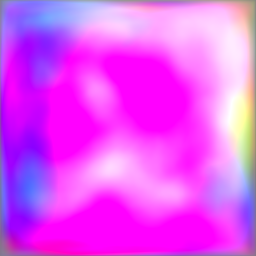

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6600.png


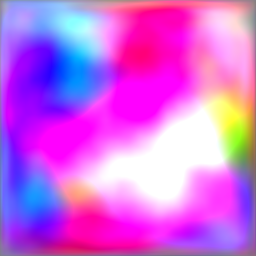

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6601.png


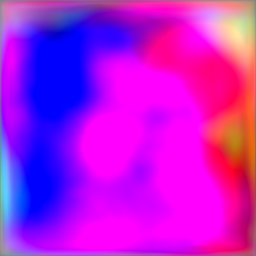

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6602.png


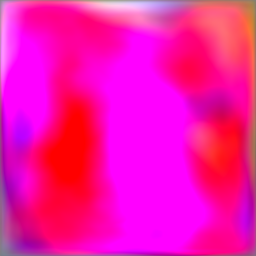

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6603.png


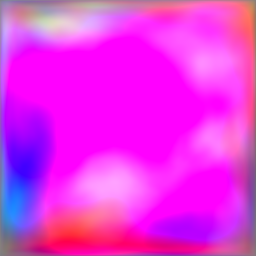

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6604.png


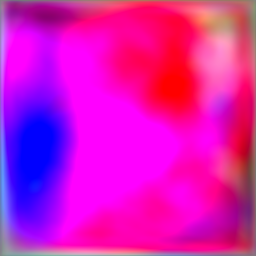

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6605.png


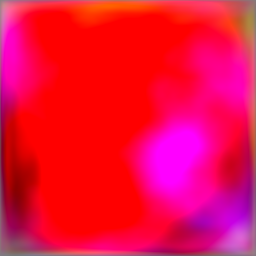

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6606.png


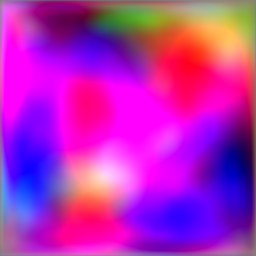

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6607.png


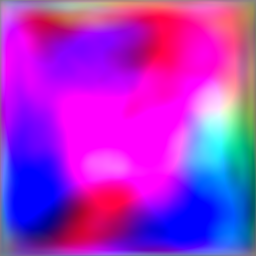

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6608.png


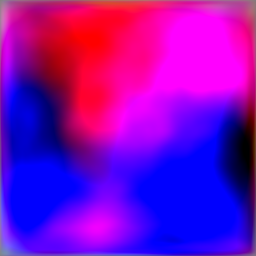

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6609.png


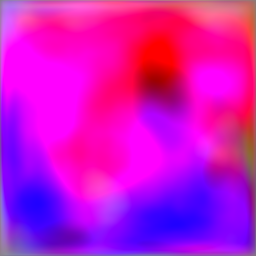

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6610.png


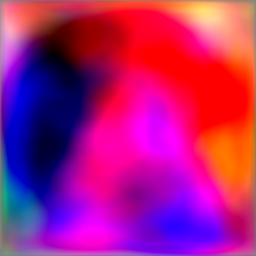

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6611.png


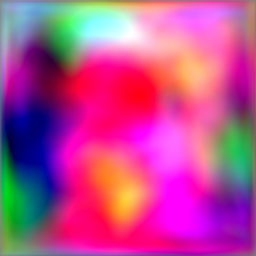

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6612.png


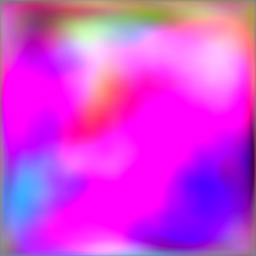

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6613.png


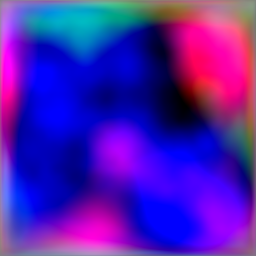

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6614.png


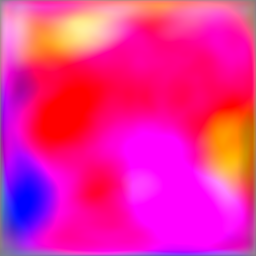

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6615.png


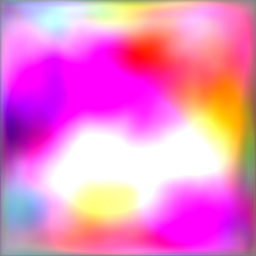

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6616.png


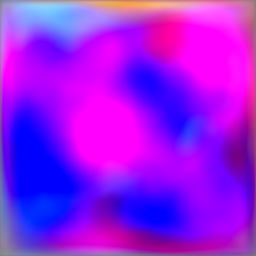

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6617.png


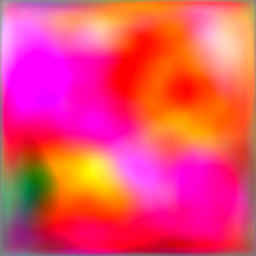

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6618.png


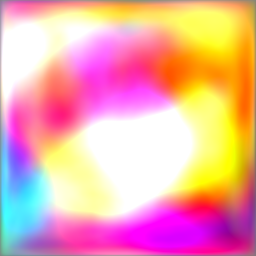

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6619.png


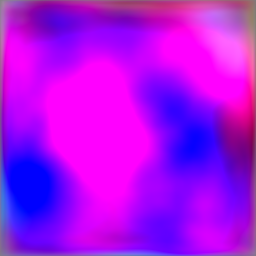

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6620.png


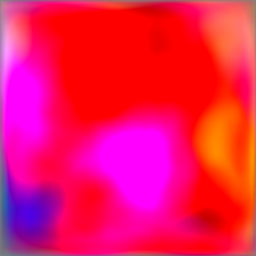

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6621.png


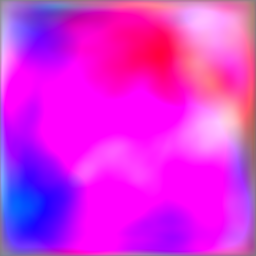

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6622.png


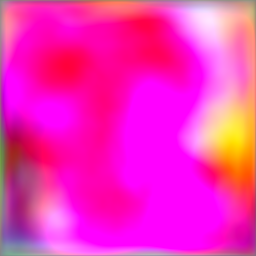

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6623.png


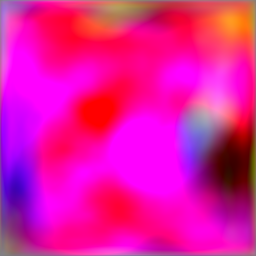

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6624.png


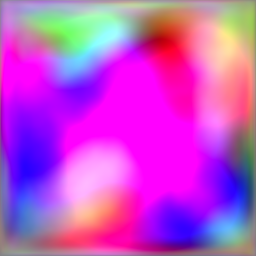

/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/seed6625.png


In [6]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/drive/My Drive/stylegan2/stylegan2/results/00003-generate-images/*.png'): 
    display(Image(filename=imageName))
    print(imageName)